# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# File to Load
load_city_data = ("Resources/city_data.csv")
load_ride_data = ("Resources/ride_data.csv")

In [2]:
# Read the city and ride data
city_data_df = pd.read_csv(load_city_data)
ride_data_df = pd.read_csv(load_ride_data)

### Merge the DataFrames

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [4]:
###  1. Get the total of rides for each city type
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [5]:
### 2. Get the total drivers for each city type
total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers.head

<bound method NDFrame.head of type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64>

In [6]:
#  3. Get the total amount of fares for each city type
total_fares= pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [7]:
#  4. Get the average fare per ride for each city type. 

In [8]:
sum_fare_per_ride = pyber_data_df.groupby(["type"]).sum()["fare"]
avg_fare_per_ride = sum_fare_per_ride / total_rides
avg_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [9]:
# 5. Get the average fare per driver for each city type. 

In [10]:
sum_fare_per_driver = pyber_data_df.groupby(["type"]).sum()["fare"]
avg_fare_per_driver = sum_fare_per_driver / total_drivers
avg_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [11]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({"Type":["Rural", "Suburban", "Urban"],
                                "Total Rides":[125, 625, 1625],
                                "Total Drivers":[78, 490, 2405],
                                "Total Fares":[4327.93, 19356.33, 39854.38],
                                "Average Fare Per Ride":[34.623440, 30.970128, 24.525772],
                                "Average Fare Per Driver":[55.486282, 39.502714, 16.571468]}).set_index("Type")
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [12]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [13]:
#  8. Format the columns.

pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:.0f}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:.0f}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map('${:,.2f}'.format)
pyber_summary_df["Average Fare Per Ride"] = pyber_summary_df["Average Fare Per Ride"].map('${:,.2f}'.format)
pyber_summary_df["Average Fare Per Driver"] = pyber_summary_df["Average Fare Per Driver"].map('${:,.2f}'.format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [14]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [15]:
pyber_data_df["date"] = pd.to_datetime(pyber_data_df["date"]).dt.date


In [16]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_df = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
pyber_df


fare
type  date              
Rural 2019-01-01   43.69
      2019-01-02   52.12
      2019-01-03   19.90
      2019-01-04   24.88
      2019-01-06   47.33
...                  ...
Urban 2019-05-04  323.57
      2019-05-05  322.10
      2019-05-06  181.20
      2019-05-07  258.01
      2019-05-08  170.82

[334 rows x 1 columns]

In [17]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
pyber_df = pyber_df.reset_index()

In [18]:
pyber_df

,type,date,fare
0,Rural,2019-01-01,43.69
1,Rural,2019-01-02,52.12
2,Rural,2019-01-03,19.90
3,Rural,2019-01-04,24.88
4,Rural,2019-01-06,47.33
...,...,...,...
329,Urban,2019-05-04,323.57
330,Urban,2019-05-05,322.10
331,Urban,2019-05-06,181.20
332,Urban,2019-05-07,258.01


In [19]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pivot_table = pyber_df.pivot(index= 'date', columns= 'type', values= 'fare')
pivot_table

type,Rural,Suburban,Urban
date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,NaN,101.36,506.89
...,...,...,...
2019-05-04,NaN,91.71,323.57
2019-05-05,26.53,154.78,322.10
2019-05-06,111.88,34.12,181.20


In [20]:
# 5. Create a new DataFrame from the pivot table DataFrame 
#using loc on the given dates, '2019-01-01':'2019-04-29'.
pyber_df = pivot_table.loc[pd.to_datetime("2019-01-01"):pd.to_datetime("2019-04-29")]
pyber_df

C:\Users\nrpin\anaconda3\lib\site-packages\pandas\core\algorithms.py:1537: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  return arr.searchsorted(value, side=side, sorter=sorter)  # type: ignore[arg-type]


type,Rural,Suburban,Urban
date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,NaN,101.36,506.89
...,...,...,...
2019-04-25,55.84,155.98,419.81
2019-04-26,NaN,132.45,330.98
2019-04-27,52.34,268.25,367.30


In [21]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
pivot_table.index = pd.to_datetime(pivot_table.index)

In [22]:
pivot_table

type,Rural,Suburban,Urban
date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,NaN,101.36,506.89
...,...,...,...
2019-05-04,NaN,91.71,323.57
2019-05-05,26.53,154.78,322.10
2019-05-06,111.88,34.12,181.20


In [23]:
# 7. Check that the datatype for the index is datetime using df.info()
pyber_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119 entries, 2019-01-01 to 2019-04-29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     74 non-null     float64
 1   Suburban  118 non-null    float64
 2   Urban     119 non-null    float64
dtypes: float64(3)
memory usage: 3.7+ KB


In [24]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pyber_new_df = pivot_table.resample('W').sum()
pyber_new_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [25]:
# 8. Using the object-oriented interface method, 
#plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style

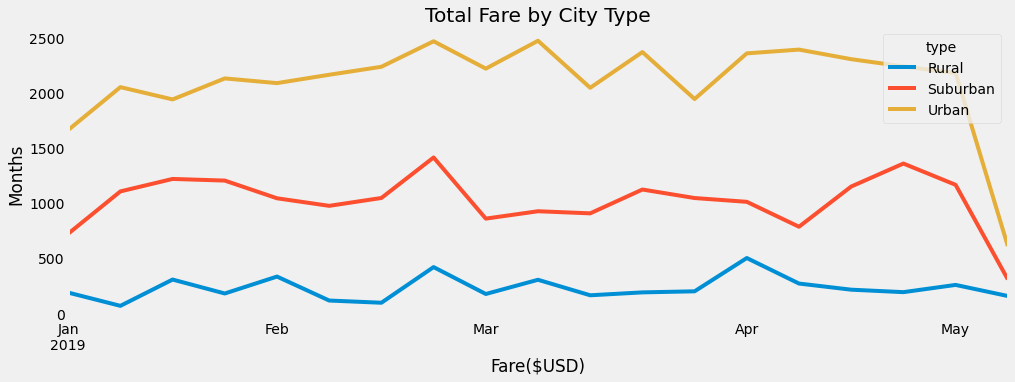

In [28]:
# Create the plot
pyber_new_df.plot(figsize = (15, 5))

# Create labels for the x and y axes.
plt.xlabel("Fare($USD)")
plt.ylabel("Months")
plt.title("Total Fare by City Type")
plt.grid()
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Save graph into Analysis folder.
plt.savefig("analysis/Fig8.png")
plt.show()